In [41]:
#Udai Nagpal, Jin Woo Won
# -----------Part 5(iv)------------
import numpy as np
import math
from numpy import linalg as LA

#Element by element sigmoid of column vector
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

#Scalar sigmoid
def sigmoid_deriv_scalar(x):
    sig_x = 1.0/(1.0 + math.exp(-x))
    return sig_x * (1-sig_x)

def sigmoid_scalar(x):
    return 1.0/(1.0 + math.exp(-x))

#Element by element sigmoid derivative of column vector
def sigmoid_deriv(x):
    output = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
        temp_arr = np.zeros((1,1))
        temp_arr[0][0] = x[i,0]
        output[i,0] = sigmoid(temp_arr) * (1 - sigmoid(temp_arr))
    return output
y = np.array([[1],[2],[-1],[-3]])
print(sigmoid(y))
print(sigmoid_deriv(y))

[[0.73105858]
 [0.88079708]
 [0.26894142]
 [0.04742587]]
[[0.19661193]
 [0.10499359]
 [0.19661193]
 [0.04517666]]


In [21]:
x = np.array([[1],[1],[3],[4]])
sigmoid(x)

array([[0.73105858],
       [0.73105858],
       [0.95257413],
       [0.98201379]])

In [2]:
def stochastic_gradient_descent (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.00001, max_iterations=50, minibatch_size=25, learning_rate=0.2):
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i], layer_sizes[i+1])) for i in range(len(layer_sizes) - 1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i], layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
                    db[sample][layer][j] = deltas[layer][j]
            for i in range(len(dW_sum)):
                dW_sum[i] = np.add(dW_sum[i], dW[sample][i])
            #print(dW[sample])
            #dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = db_sum / minibatch_size
        dW_avg = [dWi/minibatch_size for dWi in dW_sum]
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        for layer in range(num_layers-1):
            W[layer] = W[layer] - learning_rate * dW_avg[layer]
            b[layer] = b[layer] - learning_rate * db_avg[layer]
            adj_W = np.absolute(learning_rate * dW_avg[layer])
            adj_b = np.absolute(learning_rate * db_avg[layer])
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    print("Final W: " + str(W))
    print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))

In [3]:
#TEST OF STOCHASTIC GRADIENT DESCENT: COST FUNCTION IS INDEED MINIMIZED
my_input = [i.tolist() for i in np.random.uniform(size=(100,2))]
#print(my_input)
my_output = []
for j in range(len(my_input)):
    my_output.append([sigmoid_scalar(1*my_input[j][0] +2*my_input[j][1] - 1), sigmoid_scalar(1.2*my_input[j][0] +1.7*my_input[j][1] - 1.3)])
my_output = np.array(my_output)
#print(my_output)
stochastic_gradient_descent(my_input, my_output, [2,2])

Cost Function: 0.28454544739563964
Cost Function: 0.2856261082015713
Cost Function: 0.3178429652039684
Cost Function: 0.3036175961890476
Cost Function: 0.2749078839513117
Cost Function: 0.2710682022622916
Cost Function: 0.31277488285333843
Cost Function: 0.30168520620166495
Cost Function: 0.2954792768186227
Cost Function: 0.31625156987164726
Cost Function: 0.29286242276001145
Cost Function: 0.2657570986610482
Cost Function: 0.288808566224459
Cost Function: 0.26623556978465784
Cost Function: 0.31455806726570634
Cost Function: 0.29039881590210087
Cost Function: 0.2775384491851051
Cost Function: 0.2850072427284938
Cost Function: 0.26949494039913374
Cost Function: 0.3130286869238451
Cost Function: 0.36511598474310597
Cost Function: 0.32098872180993077
Cost Function: 0.26623394114218385
Cost Function: 0.298770303870257
Cost Function: 0.27373331801929973
Cost Function: 0.258972106242049
Cost Function: 0.2552160701022693
Cost Function: 0.2966324311970218
Cost Function: 0.279332528892715
Cost 

In [4]:
def adam (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.000001, max_iterations=3000, minibatch_size=100, learning_rate=0.0015):
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 10**(-8.0)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
                    db[sample][layer][j] = deltas[layer][j]
            for i in range(len(dW_sum)):
                dW_sum[i] = np.add(dW_sum[i], dW[sample][i])
            #print(dW[sample])
            #dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = db_sum / minibatch_size
        dW_avg = [dWi/minibatch_size for dWi in dW_sum]
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        for layer in range(num_layers-1):
            m[layer] = beta_1 * m[layer] + (1-beta_1)*dW_avg[layer]
            v[layer] = beta_2 * v[layer] + (1-beta_2)*np.square(dW_avg[layer])
            eps_matrix = epsilon * np.ones((np.shape(dW_avg[layer])[0], np.shape(dW_avg[layer])[1]))
            W[layer] = W[layer] - learning_rate * np.divide(m[layer], np.add(np.sqrt(v[layer]), eps_matrix))
            m_b[layer] = beta_1 * m_b[layer] + (1-beta_1)*db_avg[layer]
            v_b[layer] = beta_2 * v_b[layer] + (1-beta_2)*np.square(db_avg[layer])
            eps_matrix_b = epsilon * np.ones((np.shape(db_avg[layer])[0]))
            b[layer] = b[layer] - learning_rate * np.divide(m_b[layer], np.add(np.sqrt(v_b[layer]), eps_matrix_b))
            #b[layer] = b[layer] - learning_rate * db_avg[layer]
            adj_W = np.absolute(learning_rate * np.divide(m[layer], np.add(np.sqrt(v[layer]), eps_matrix)))
            adj_b = np.absolute(learning_rate * np.divide(m_b[layer], np.add(np.sqrt(v_b[layer]), eps_matrix_b)))
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    print("Final W: " + str(W))
    print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

#Testing adam
adam(input_data=my_input, output_data = my_output, inter_layer_sizes=[256,128],max_iterations=50, minibatch_size=15)

Cost Function: 0.12079137737129993
Cost Function: 0.08801134089221149
Cost Function: 0.14806476427318244
Cost Function: 0.1195410893097882
Cost Function: 0.07464137697828514
Cost Function: 0.12343349128897493
Cost Function: 0.09081113629037786
Cost Function: 0.07245572382449297
Cost Function: 0.11365677037386891
Cost Function: 0.1346215639712975
Cost Function: 0.08793710163611605
Cost Function: 0.08617097574904017
Cost Function: 0.11309850553825203
Cost Function: 0.1034418529707422
Cost Function: 0.1001831026909947
Cost Function: 0.0894016835012251
Cost Function: 0.08182453365712118
Cost Function: 0.08403425870126079
Cost Function: 0.0900262561452875
Cost Function: 0.08006794418013004
Cost Function: 0.09797876172547378
Cost Function: 0.0534908642104338
Cost Function: 0.045465975817086245
Cost Function: 0.06636516170316156
Cost Function: 0.08224241487958675
Cost Function: 0.08316479468789449
Cost Function: 0.08372927443364388
Cost Function: 0.09537645139698629
Cost Function: 0.088013584

[[0.46862209465812177, 0.4392888302343429],
 [0.47193173004151295, 0.4360583715487365],
 [0.4496207533712166, 0.45794116010262464],
 [0.4659276874006687, 0.4419581858165651],
 [0.4690947016510776, 0.43880387942205157],
 [0.46119529876088355, 0.4464474932388842],
 [0.47335540569356155, 0.4346944472299449],
 [0.4665560690993997, 0.4413207951056514],
 [0.44697197532541644, 0.4606043269024722],
 [0.4625595108059079, 0.4452639923827097],
 [0.46620649282039855, 0.4416297975034501],
 [0.4713333416815452, 0.43666049538926754],
 [0.46136790261613964, 0.44640783450715926],
 [0.4638589280096711, 0.44389689873779264],
 [0.4562609986025754, 0.4513634631129138],
 [0.4560970962471208, 0.45148136815152107],
 [0.46200773428467445, 0.4456303861436608],
 [0.46707427904284476, 0.44086072809986543],
 [0.46679071914222253, 0.4410359953785032],
 [0.464920532353346, 0.4428777076677821],
 [0.4516309443678781, 0.45587396215966863],
 [0.4644427937184887, 0.4434069551513441],
 [0.4721898579335088, 0.4358261295586

In [10]:
#--------------PART 5(v)----------------
#Gathering Data & Learning Lincoln Image
%matplotlib inline
from scipy.io import loadmat
from matplotlib import pyplot
x = loadmat('hw2_data.mat')
X1 = x['X1']
Y1 = x['Y1']
X2 = x['X2']
Y2 = x['Y2']
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
img_1 = Y1.reshape(100, 76)

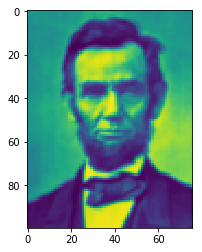

In [11]:
pyplot.imshow(img_1)

In [5]:
#pyplot.imshow(X=img_1, cmap='gray')
#pyplot.imshow(X=img_2)
Y1_norm = np.divide(Y1, np.amax(Y1))

#Training Lincoln Model
Y1_pred = adam(input_data = X1, output_data = Y1_norm, inter_layer_sizes=[128,256], max_iterations=10, minibatch_size=128, learning_rate=0.001)

Cost Function: 0.15817464607008952
Cost Function: 0.12462814923855647
Cost Function: 0.12467490012212222
Cost Function: 0.0863192726109729
Cost Function: 0.10869372717343442
Cost Function: 0.08624423977923498
Cost Function: 0.06550396780069384
Cost Function: 0.08767956500271767
Cost Function: 0.06367818846446174
Cost Function: 0.05977075407311705
Final W: [array([[ 0.67721086, -0.33622633, -0.77526667, -0.94661386,  0.92891785,
        -0.50255709,  0.73905927, -0.7250739 , -0.96560575,  0.84438899,
         0.22645912,  0.20656774,  0.78302779,  0.64577577,  0.11158567,
         0.50074543, -0.25186305,  0.05632023, -0.34161708, -0.29666561,
         0.00230845,  0.73307856, -0.3210097 ,  0.96831552, -0.25979807,
        -0.1083531 , -0.98371996,  0.58868636,  0.67133963, -0.38498688,
        -0.91747662,  0.77008265, -0.77317486,  0.44089265, -0.1824507 ,
        -0.13559093, -0.09033747, -0.5935132 ,  0.3257549 ,  0.97911195,
         0.11490696, -0.8659656 , -0.44149876,  0.8242874

[[0.57740587]
 [0.58577406]
 [0.60251045]
 ...
 [0.21757323]
 [0.19246861]
 [0.17573221]]


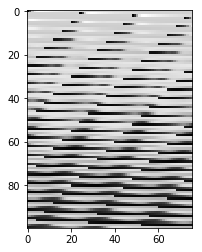

In [6]:
#Showing Lincoln Results
print(Y1_norm)
#print(Y1_pred)
#print(Y1_pred)
pyplot.imshow(X=np.array(Y1_pred).reshape(100,76), cmap='gray')

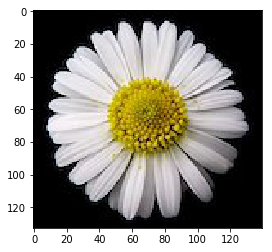

In [9]:
# Flower ogirinal
pyplot.imshow(img_2)

In [14]:
#Training Flower Model
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
Y2_norm = np.divide(Y2, np.amax(Y2))
Y2_pred = adam(input_data=X2, output_data=Y2_norm, inter_layer_sizes=[32,16], max_iterations=4000, minibatch_size=1024, learning_rate=0.001)

Cost Function: 0.22696101943203648
Cost Function: 0.21954889503509975
Cost Function: 0.22591108869340784
Cost Function: 0.22241484585576396
Cost Function: 0.21489875638291922
Cost Function: 0.21648263655050864
Cost Function: 0.2193579672821089
Cost Function: 0.2182470918787698
Cost Function: 0.21945719761665258
Cost Function: 0.21369923991594433
Cost Function: 0.21475250780194508
Cost Function: 0.2170296780721757
Cost Function: 0.2147359778358869
Cost Function: 0.2081512819246459
Cost Function: 0.21087846420627404
Cost Function: 0.20857776337701014
Cost Function: 0.21215573339858262
Cost Function: 0.2110147836877361
Cost Function: 0.2096328642700627
Cost Function: 0.2134086684570227
Cost Function: 0.20967157527025646
Cost Function: 0.21146817071939542
Cost Function: 0.207030918035021
Cost Function: 0.20562043026697516
Cost Function: 0.21033555720022598
Cost Function: 0.20742850140004215
Cost Function: 0.20612062594166988
Cost Function: 0.20745730563054016
Cost Function: 0.2074431317821

Cost Function: 0.18128897028624713
Cost Function: 0.18098726489640796
Cost Function: 0.18714413224845192
Cost Function: 0.17828395106099001
Cost Function: 0.17166788394670435
Cost Function: 0.1722145477613435
Cost Function: 0.18239836030187764
Cost Function: 0.17931297636769522
Cost Function: 0.17994745220299552
Cost Function: 0.1741624004101855
Cost Function: 0.18104333071030526
Cost Function: 0.17554793620807868
Cost Function: 0.17530675843499016
Cost Function: 0.17029372779420504
Cost Function: 0.1783431549714263
Cost Function: 0.18027604122566243
Cost Function: 0.17584979049606012
Cost Function: 0.18342827112135107
Cost Function: 0.1791264156480847
Cost Function: 0.1779654076681744
Cost Function: 0.1776057440386477
Cost Function: 0.17547376197841635
Cost Function: 0.17111802740007553
Cost Function: 0.171550832471911
Cost Function: 0.16776231789929952
Cost Function: 0.17502430291996923
Cost Function: 0.18177941415610746
Cost Function: 0.17950429503335255
Cost Function: 0.17474975910

Cost Function: 0.1714980485927499
Cost Function: 0.17027157896038322
Cost Function: 0.16820695149426562
Cost Function: 0.1675183645236872
Cost Function: 0.1823620608195017
Cost Function: 0.16200088661388654
Cost Function: 0.16972657997170998
Cost Function: 0.17317094891171164
Cost Function: 0.170024794586898
Cost Function: 0.1681474645147527
Cost Function: 0.1723026992726439
Cost Function: 0.16565026035248576
Cost Function: 0.15672521542147952
Cost Function: 0.17376763662452355
Cost Function: 0.16892746546914897
Cost Function: 0.16791753649791555
Cost Function: 0.16467798401212627
Cost Function: 0.18236070844593152
Cost Function: 0.16907072041674132
Cost Function: 0.17280585762412506
Cost Function: 0.16462043344875504
Cost Function: 0.1710273193984985
Cost Function: 0.16668667054731734
Cost Function: 0.1637585963184508
Cost Function: 0.16600268935102136
Cost Function: 0.16678911783014969
Cost Function: 0.16662159293753467
Cost Function: 0.16510692439506033
Cost Function: 0.163407334279

Cost Function: 0.16573025313366624
Cost Function: 0.16417682831686645
Cost Function: 0.1678926450918542
Cost Function: 0.17235309120519116
Cost Function: 0.16760644442340883
Cost Function: 0.1688399612269319
Cost Function: 0.16518304146976073
Cost Function: 0.16428560096461955
Cost Function: 0.1616713982028949
Cost Function: 0.16783713274604592
Cost Function: 0.16267876507191317
Cost Function: 0.1613983986041209
Cost Function: 0.16412770640600927
Cost Function: 0.1632579757487661
Cost Function: 0.16634786763063691
Cost Function: 0.16272875662309078
Cost Function: 0.16495296524944572
Cost Function: 0.16164830015718984
Cost Function: 0.1634918270036507
Cost Function: 0.16586449289526195
Cost Function: 0.1563881299796254
Cost Function: 0.16905268735352855
Cost Function: 0.16021258500721886
Cost Function: 0.16921780202875533
Cost Function: 0.16625560576223772
Cost Function: 0.16497040893949197
Cost Function: 0.16110162901007982
Cost Function: 0.15824810785718166
Cost Function: 0.1650561176

Cost Function: 0.15829675853813774
Cost Function: 0.16173351291259574
Cost Function: 0.15362890797356807
Cost Function: 0.16575914738024364
Cost Function: 0.1642451110432821
Cost Function: 0.15623079276251833
Cost Function: 0.16189000165321502
Cost Function: 0.16280084059224184
Cost Function: 0.16841097412411468
Cost Function: 0.16115725126174335
Cost Function: 0.15605689331030007
Cost Function: 0.1556360354879927
Cost Function: 0.16810365362410326
Cost Function: 0.1593237064157888
Cost Function: 0.15858435605508564
Cost Function: 0.15526116290067768
Cost Function: 0.1620253473127765
Cost Function: 0.16636404372350463
Cost Function: 0.15844950756177653
Cost Function: 0.15925426691449193
Cost Function: 0.1572552358330909
Cost Function: 0.157333372083697
Cost Function: 0.15972911946538468
Cost Function: 0.1581492503652565
Cost Function: 0.16604271427655082
Cost Function: 0.15498967133523706
Cost Function: 0.1576509281121675
Cost Function: 0.16210786803608485
Cost Function: 0.158374812974

Cost Function: 0.1596990196131536
Cost Function: 0.16081407269859338
Cost Function: 0.16177396803676597
Cost Function: 0.16301015228669247
Cost Function: 0.16281452524368342
Cost Function: 0.16513291444961298
Cost Function: 0.15740972340722298
Cost Function: 0.15556259833954378
Cost Function: 0.16798864154236345
Cost Function: 0.1646081748528316
Cost Function: 0.16269456193362225
Cost Function: 0.15547395321543886
Cost Function: 0.16320036681931147
Cost Function: 0.16091184808826417
Cost Function: 0.15625820998001408
Cost Function: 0.15742117768247368
Cost Function: 0.15702532061776978
Cost Function: 0.1573608326762158
Cost Function: 0.15630581721947867
Cost Function: 0.16066563354327038
Cost Function: 0.1726100400598055
Cost Function: 0.1646978868683323
Cost Function: 0.16040374045323338
Cost Function: 0.15670621817195443
Cost Function: 0.15137231906144694
Cost Function: 0.15178173172393683
Cost Function: 0.16206229772822667
Cost Function: 0.15061035497485584
Cost Function: 0.16293885

Cost Function: 0.15604887854864533
Cost Function: 0.160290768437402
Cost Function: 0.15102495315141848
Cost Function: 0.16304233168979382
Cost Function: 0.1633357069252287
Cost Function: 0.1583696289535866
Cost Function: 0.16572162483763464
Cost Function: 0.1602023531099532
Cost Function: 0.1601832821653832
Cost Function: 0.16934645966510703
Cost Function: 0.15102708246468166
Cost Function: 0.153811105141726
Cost Function: 0.15368571835843195
Cost Function: 0.1582679004673936
Cost Function: 0.16256544643093
Cost Function: 0.15146764608853366
Cost Function: 0.16365324673381856
Cost Function: 0.15720232189045516
Cost Function: 0.15711199903898762
Cost Function: 0.158856029765232
Cost Function: 0.15564368848875626
Cost Function: 0.15799777934027986
Cost Function: 0.1474020582434142
Cost Function: 0.15372972876833899
Cost Function: 0.16140281652515012
Cost Function: 0.16077882622828502
Cost Function: 0.1561792907322142
Cost Function: 0.15140270779111764
Cost Function: 0.15909158014386793
C

Cost Function: 0.16171051328985506
Cost Function: 0.15658508265818763
Cost Function: 0.15236196591885048
Cost Function: 0.16450771460672772
Cost Function: 0.15915278530789387
Cost Function: 0.15551068020898906
Cost Function: 0.16289225556447576
Cost Function: 0.15702515037849765
Cost Function: 0.1561948030064229
Cost Function: 0.14861207950399533
Cost Function: 0.1596161102337206
Cost Function: 0.1597930029715015
Cost Function: 0.15468621275248204
Cost Function: 0.15804442621925402
Cost Function: 0.14973238428466318
Cost Function: 0.15263310231990757
Cost Function: 0.15356547511185134
Cost Function: 0.1637231440271585
Cost Function: 0.16241498996428927
Cost Function: 0.15484474965983316
Cost Function: 0.155328301599274
Cost Function: 0.15642150468057298
Cost Function: 0.16567913735209258
Cost Function: 0.15230128219032935
Cost Function: 0.16068150518160632
Cost Function: 0.16118360926897354
Cost Function: 0.15054987244667564
Cost Function: 0.15586612955826412
Cost Function: 0.158014199

Cost Function: 0.150368951594084
Cost Function: 0.15599957770645553
Cost Function: 0.1498931642917674
Cost Function: 0.15484999737140898
Cost Function: 0.15022990544144632
Cost Function: 0.15398069612012613
Cost Function: 0.15429697747936574
Cost Function: 0.15543038706546827
Cost Function: 0.16112420550659415
Cost Function: 0.15427902773060162
Cost Function: 0.15643200338851498
Cost Function: 0.15386353675982098
Cost Function: 0.15549456369925377
Cost Function: 0.1531385633904417
Cost Function: 0.15396314789505308
Cost Function: 0.15680026073239586
Cost Function: 0.16330483573742804
Cost Function: 0.1529190004330842
Cost Function: 0.1565194700069986
Cost Function: 0.14702775431272058
Cost Function: 0.15376396928273814
Cost Function: 0.156160607778897
Cost Function: 0.15335964601166494
Cost Function: 0.15061658752429383
Cost Function: 0.15896083141477602
Cost Function: 0.15150272299307774
Cost Function: 0.15956146482754546
Cost Function: 0.15458436497465447
Cost Function: 0.15571061837

Cost Function: 0.1534155609902988
Cost Function: 0.15052831487854176
Cost Function: 0.15339779329629813
Cost Function: 0.15710681137040572
Cost Function: 0.15131574472125517
Cost Function: 0.14886583832303815
Cost Function: 0.1558980069879097
Cost Function: 0.15416365050387512
Cost Function: 0.1502086843803
Cost Function: 0.15006102907874314
Cost Function: 0.15797925174698205
Cost Function: 0.15613615093542635
Cost Function: 0.16244685729974107
Cost Function: 0.15513599967803932
Cost Function: 0.15469577510999383
Cost Function: 0.14715972194856156
Cost Function: 0.14607183925791645
Cost Function: 0.16113860084610557
Cost Function: 0.15359993314036904
Cost Function: 0.15589596723631466
Cost Function: 0.15564765982260564
Cost Function: 0.1554120186662171
Cost Function: 0.15412163208355992
Cost Function: 0.14627333954815736
Cost Function: 0.14637685425396293
Cost Function: 0.15757446828876345
Cost Function: 0.16919743428320486
Cost Function: 0.16128306471956674
Cost Function: 0.1622399673

Cost Function: 0.15428354710389922
Cost Function: 0.15604112342531656
Cost Function: 0.15939958553536818
Cost Function: 0.14738723133566506
Cost Function: 0.153789856144868
Cost Function: 0.153366680731274
Cost Function: 0.15196466463049235
Cost Function: 0.1471223737772866
Cost Function: 0.15165039504470618
Cost Function: 0.15335489448749368
Cost Function: 0.1499923503936588
Cost Function: 0.15055889942432768
Cost Function: 0.15047247702033648
Cost Function: 0.1539734737622158
Cost Function: 0.15832335495770758
Cost Function: 0.16139884245614033
Cost Function: 0.15888246229550013
Cost Function: 0.14668832098772958
Cost Function: 0.16254319012585522
Cost Function: 0.1492135738469866
Cost Function: 0.1547498303488371
Cost Function: 0.15121922668160048
Cost Function: 0.15614575772716716
Cost Function: 0.1514787917799821
Cost Function: 0.14497160728933112
Cost Function: 0.1536999815557797
Cost Function: 0.15613632694937618
Cost Function: 0.1527346067379318
Cost Function: 0.161165058921819

Cost Function: 0.14454490649702964
Cost Function: 0.1467252025767984
Cost Function: 0.14790619490137566
Cost Function: 0.15534560383513715
Cost Function: 0.15465165716361712
Cost Function: 0.15643239809988874
Cost Function: 0.1493039047128402
Cost Function: 0.15452304562536912
Cost Function: 0.14890608102784736
Cost Function: 0.14889956144460567
Cost Function: 0.15212871275086431
Cost Function: 0.15013056579297204
Cost Function: 0.15069637497239718
Cost Function: 0.15222168307362283
Cost Function: 0.15524417990509878
Cost Function: 0.14926978174031874
Cost Function: 0.1566776630035275
Cost Function: 0.15846560157942305
Cost Function: 0.15659391033008008
Cost Function: 0.15254990619603728
Cost Function: 0.15341992880858568
Cost Function: 0.1551339817463838
Cost Function: 0.15542208503794416
Cost Function: 0.1518724543157932
Cost Function: 0.161578143095829
Cost Function: 0.1516342173743335
Cost Function: 0.14165397041508088
Cost Function: 0.15345503121203574
Cost Function: 0.15764026220

Cost Function: 0.15222576921728173
Cost Function: 0.15629663485041564
Cost Function: 0.15172889651591495
Cost Function: 0.152804725006207
Cost Function: 0.15380784184463245
Cost Function: 0.1514670206114416
Cost Function: 0.15946721164373215
Cost Function: 0.15506078992600877
Cost Function: 0.1495383854652908
Cost Function: 0.1540500239620749
Cost Function: 0.15214479124172753
Cost Function: 0.15317188601373408
Cost Function: 0.15741468959954882
Cost Function: 0.15382439213906537
Cost Function: 0.15129220694900627
Cost Function: 0.15702677294158496
Cost Function: 0.15240050735561886
Cost Function: 0.1481436100689432
Cost Function: 0.15254769445223393
Cost Function: 0.15106986528329705
Cost Function: 0.15445254075250914
Cost Function: 0.14899045426726082
Cost Function: 0.15682060778889645
Cost Function: 0.14532706418772934
Cost Function: 0.14543336484063416
Cost Function: 0.1514939348137587
Cost Function: 0.15087319177894237
Cost Function: 0.15556299524020745
Cost Function: 0.1547029237

Cost Function: 0.14992011997898294
Cost Function: 0.15251904820640813
Cost Function: 0.14199307373533368
Cost Function: 0.15617450927572255
Cost Function: 0.14275442167176208
Cost Function: 0.15017632861456842
Cost Function: 0.15578837455690336
Cost Function: 0.14519421036693478
Cost Function: 0.1466356370384618
Cost Function: 0.14436913262622783
Cost Function: 0.15703809154898418
Cost Function: 0.15250295446584508
Cost Function: 0.15253111813509573
Cost Function: 0.1546032004223308
Cost Function: 0.14017354416571262
Cost Function: 0.1474478053283454
Cost Function: 0.14847459907538366
Cost Function: 0.14580110850571193
Cost Function: 0.1577842161263247
Cost Function: 0.14830092378133516
Cost Function: 0.15241902420470307
Cost Function: 0.15422605168361653
Cost Function: 0.1456759129239033
Cost Function: 0.15512228635604922
Cost Function: 0.1400305062121401
Cost Function: 0.15139453104456088
Cost Function: 0.1480548911817388
Cost Function: 0.14974290034450205
Cost Function: 0.1422020922

Cost Function: 0.1452778199992109
Cost Function: 0.14088503781703118
Cost Function: 0.14529288850673322
Cost Function: 0.1582053527144539
Cost Function: 0.1487767599346974
Cost Function: 0.14579483754390365
Cost Function: 0.14761919686126074
Cost Function: 0.1413569567324826
Cost Function: 0.1532235661342672
Cost Function: 0.1557820884940831
Cost Function: 0.1457823911667375
Cost Function: 0.1501465566901506
Cost Function: 0.14979822801955897
Cost Function: 0.1480582042622901
Cost Function: 0.15056971548408776
Cost Function: 0.14435085336838638
Cost Function: 0.16181656575625844
Cost Function: 0.1527425816156414
Cost Function: 0.1523877151685895
Cost Function: 0.15030001115065195
Cost Function: 0.14628198727888558
Cost Function: 0.14559744571301383
Cost Function: 0.1511844692250708
Cost Function: 0.15775935602635918
Cost Function: 0.14782976788853527
Cost Function: 0.14785092497497304
Cost Function: 0.1517861376216927
Cost Function: 0.14477062773338506
Cost Function: 0.1564453920586445

Cost Function: 0.14498641919268052
Cost Function: 0.1361703835265791
Cost Function: 0.1462742091784602
Cost Function: 0.14668703729189647
Cost Function: 0.14969672960316255
Cost Function: 0.14893413943231
Cost Function: 0.14497789602214728
Cost Function: 0.14828424944631058
Cost Function: 0.14834152162810474
Cost Function: 0.14489649402278865
Cost Function: 0.1434310863172398
Cost Function: 0.14987336608204443
Cost Function: 0.15059296220157353
Cost Function: 0.1513177449144063
Cost Function: 0.147669596465092
Cost Function: 0.14870601969963876
Cost Function: 0.1470868867148112
Cost Function: 0.1508891236977833
Cost Function: 0.145545163332957
Cost Function: 0.1491093268031324
Cost Function: 0.15233811893574742
Cost Function: 0.14998551720900757
Cost Function: 0.1471209799470891
Cost Function: 0.14549670139285592
Cost Function: 0.14883045190689242
Cost Function: 0.15347529979459476
Cost Function: 0.15519577111574684
Cost Function: 0.14555731486572918
Cost Function: 0.14756202916231867


Cost Function: 0.15080132327027154
Cost Function: 0.15039679585642965
Cost Function: 0.1533220503793479
Cost Function: 0.1485386257509604
Cost Function: 0.15030754992813938
Cost Function: 0.14936292946690552
Cost Function: 0.14465940781712114
Cost Function: 0.14929999247224915
Cost Function: 0.14906236087786434
Cost Function: 0.1478899774008414
Cost Function: 0.15419084037499273
Cost Function: 0.1346799904258786
Cost Function: 0.1443841326568186
Cost Function: 0.14147237341362612
Cost Function: 0.14534603670840543
Cost Function: 0.14699830603617695
Cost Function: 0.141402260595077
Cost Function: 0.14143322702688957
Cost Function: 0.1547484927950687
Cost Function: 0.1505276171668584
Cost Function: 0.13890961036085506
Cost Function: 0.1462619090690929
Cost Function: 0.14709169092922697
Cost Function: 0.15309734998084204
Cost Function: 0.1437094088839828
Cost Function: 0.14553544889063597
Cost Function: 0.14381450401317458
Cost Function: 0.15449560626157066
Cost Function: 0.13687510817558

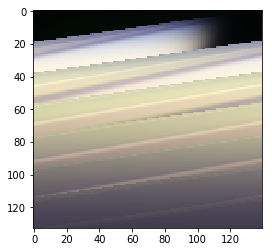

In [13]:
#Showing Flower Results
pyplot.imshow(X=np.array(Y2_pred).reshape(133,140,3)/np.amax(Y2_pred))
pyplot.show()